# Customer Segmentation

Based on **Customer Lifetime Value (CLV)**, **purchase frequency**, and **Average Order Value (AOV)**, customers were segmented into **three distinct groups** using K-Means clustering.


In [22]:
import pandas as pd

customer_features = pd.read_csv('../data/processed/customer_behavior_analysis.csv')

# Remove customers with zero or negative CLV values
customer_features = customer_features[customer_features['CLV'] > 0]

X = customer_features[['CLV', 'Frequency', 'AOV']]

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

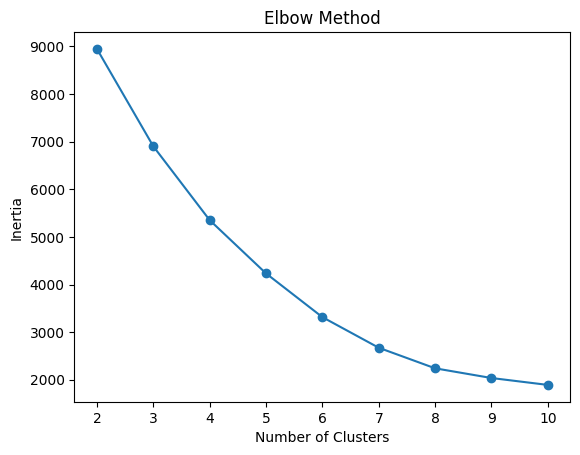

In [ ]:
# In this code cell, we will use the elbow method to determine the optimal number of clusters
# This does not do anything to the data, just helps us visualize how many clusters do we need
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=123)
customer_features['Cluster'] = kmeans.fit_predict(X_scaled)

In [26]:
cluster_summary = (
    customer_features
    .groupby('Cluster')
    .agg(
        Customers=('CustomerID', 'count'),
        Avg_CLV=('CLV', 'mean'),
        Avg_Frequency=('Frequency', 'mean'),
        Avg_AOV=('AOV', 'mean')
    )
    .sort_values('Avg_CLV', ascending=False)
)

cluster_summary

,Customers,Avg_CLV,Avg_Frequency,Avg_AOV
Cluster,,,,
2,6,182108.075000,89.000000,3029.973560
0,116,17848.018190,29.137931,1392.209415
1,4199,1221.417005,4.332936,287.349318


In [ ]:
cluster_map = {
    2: 'High-Value Loyal Customers',
    0: 'Regular Repeat Customers',
    1: 'One-Time / Low-Value Customers'
}

customer_features['Segment'] = customer_features['Cluster'].map(cluster_map)

,CustomerID,CLV,Frequency,AOV,Cluster
count,4321.000000,4.321000e+03,4321.000000,4.321000e+03,4321.000000
mean,15297.845869,1.918942e+03,5.116408,3.208183e+02,0.974543
std,1721.137878,8.263394e+03,9.385426,3.510511e+02,0.166110
min,12347.000000,3.552714e-15,1.000000,1.776357e-15,0.000000
25%,13812.000000,3.008300e+02,1.000000,1.531075e+02,1.000000
50%,15297.000000,6.533500e+02,3.000000,2.375900e+02,1.000000
75%,16777.000000,1.624140e+03,6.000000,3.710100e+02,1.000000
max,18287.000000,2.794890e+05,248.000000,6.207670e+03,2.000000


## Results/Interpretation

Customers were segmented into **three distinct groups** using K-Means clustering.

---

### Cluster 2 — High-Value Loyal Customers
- **Customers:** 6  
- **Average CLV:** ~182,108  
- **Average Frequency:** ~89 purchases  
- **Average AOV:** ~3,030  

**Interpretation:**  
This small segment generates exceptionally high revenue per customer. Their frequent purchases and high order values indicate strong loyalty and long-term engagement.

**Business Action:**  
Focus on retention through VIP programs, personalized offers, and premium support to protect this high-impact segment.

---

### Cluster 0 — Regular Repeat Customers
- **Customers:** 116  
- **Average CLV:** ~17,848  
- **Average Frequency:** ~29 purchases  
- **Average AOV:** ~1,392  

**Interpretation:**  
These customers form a stable revenue base with consistent purchasing behavior and moderate spending per order.

**Business Action:**  
Use upselling, cross-selling, and loyalty incentives to increase order value and purchase frequency.

---

### Cluster 1 — One-Time / Low-Value Customers
- **Customers:** 4,199  
- **Average CLV:** ~1,221  
- **Average Frequency:** ~4 purchases  
- **Average AOV:** ~287  

**Interpretation:**  
This is the largest customer group but contributes the least revenue per customer, indicating low engagement and limited repeat purchases.

**Business Action:**  
Apply conversion strategies such as onboarding discounts, follow-up emails, and targeted promotions to encourage repeat buying.

---

### Overall Insight
- Customer value is highly concentrated in a small group of loyal customers.
- Strategic retention of high-value customers and targeted engagement of low-value segments can significantly improve overall revenue performance.
